# Regression Model Comparison - Rock Density Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
from sklearn.pipeline import make_pipeline

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
from sklearn.model_selection import GridSearchCV

## Import Dataset

In [8]:
df = pd.read_csv('rock_density_xray.csv')

In [9]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [11]:
df.describe()

,Rebound Signal Strength nHz,Rock Density kg/m3
count,300.000000,300.000000
mean,49.725766,2.225063
std,28.341792,0.314512
min,0.700227,1.500000
25%,25.685798,1.987830
50%,50.602886,2.268597
75%,74.854294,2.476944
max,98.831658,2.750000


In [12]:
df.isnull().sum()

Rebound Signal Strength nHz    0
Rock Density kg/m3             0
dtype: int64

### Renaming Columns

Renaming Columns for Simplicity

In [13]:
df.columns = ['Signal', 'Density']

## Exploratory Data Analysis

<Axes: xlabel='Signal', ylabel='Density'>

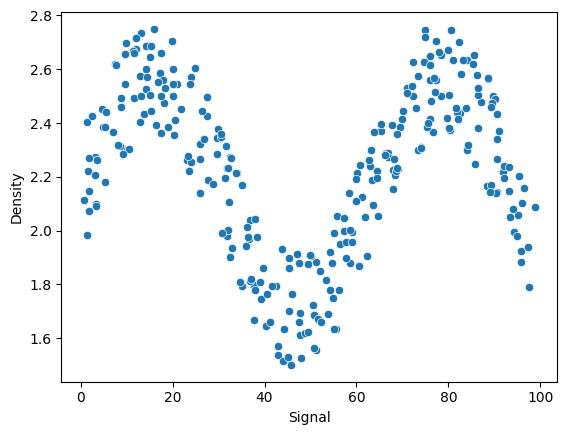

In [14]:
sns.scatterplot(data=df, x='Signal', y='Density')

## Separating X and Y Columns

In [15]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Creating Different Models

### Creating Linear Regression Model

In [17]:
linear_regression_model = LinearRegression()

In [18]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

#### Prediction and Evaluation

In [19]:
linear_regression_predictions = linear_regression_model.predict(X_test)

In [20]:
linear_regression_predictions

array([2.21881855, 2.20065352, 2.21472324, 2.21799439, 2.20901592,
       2.21894912, 2.22381933, 2.21787738, 2.20368222, 2.2034435 ,
       2.22610239, 2.2004913 , 2.23485715, 2.24374317, 2.22322118,
       2.2158634 , 2.20285925, 2.22864354, 2.21659998, 2.23722892,
       2.20802066, 2.24431374, 2.20739768, 2.20614465, 2.19981917,
       2.23643331, 2.19917144, 2.25415309, 2.2100169 , 2.20405209])

In [21]:
print(f"MAE: {mean_absolute_error(y_test, linear_regression_predictions)}")
print(f"MSE: {mean_squared_error(y_test, linear_regression_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, linear_regression_predictions))}")

MAE: 0.24102551432457792
MSE: 0.08782350344651227
RMSE: 0.29635030529174805


In [22]:
signal_range = np.arange(0,100)

In [23]:
signal_predictions = linear_regression_model.predict(signal_range.reshape(-1, 1))
signal_predictions

array([2.25455042, 2.25398299, 2.25341557, 2.25284815, 2.25228073,
       2.25171331, 2.25114589, 2.25057846, 2.25001104, 2.24944362,
       2.2488762 , 2.24830878, 2.24774136, 2.24717394, 2.24660651,
       2.24603909, 2.24547167, 2.24490425, 2.24433683, 2.24376941,
       2.24320198, 2.24263456, 2.24206714, 2.24149972, 2.2409323 ,
       2.24036488, 2.23979745, 2.23923003, 2.23866261, 2.23809519,
       2.23752777, 2.23696035, 2.23639293, 2.2358255 , 2.23525808,
       2.23469066, 2.23412324, 2.23355582, 2.2329884 , 2.23242097,
       2.23185355, 2.23128613, 2.23071871, 2.23015129, 2.22958387,
       2.22901644, 2.22844902, 2.2278816 , 2.22731418, 2.22674676,
       2.22617934, 2.22561192, 2.22504449, 2.22447707, 2.22390965,
       2.22334223, 2.22277481, 2.22220739, 2.22163996, 2.22107254,
       2.22050512, 2.2199377 , 2.21937028, 2.21880286, 2.21823544,
       2.21766801, 2.21710059, 2.21653317, 2.21596575, 2.21539833,
       2.21483091, 2.21426348, 2.21369606, 2.21312864, 2.21256

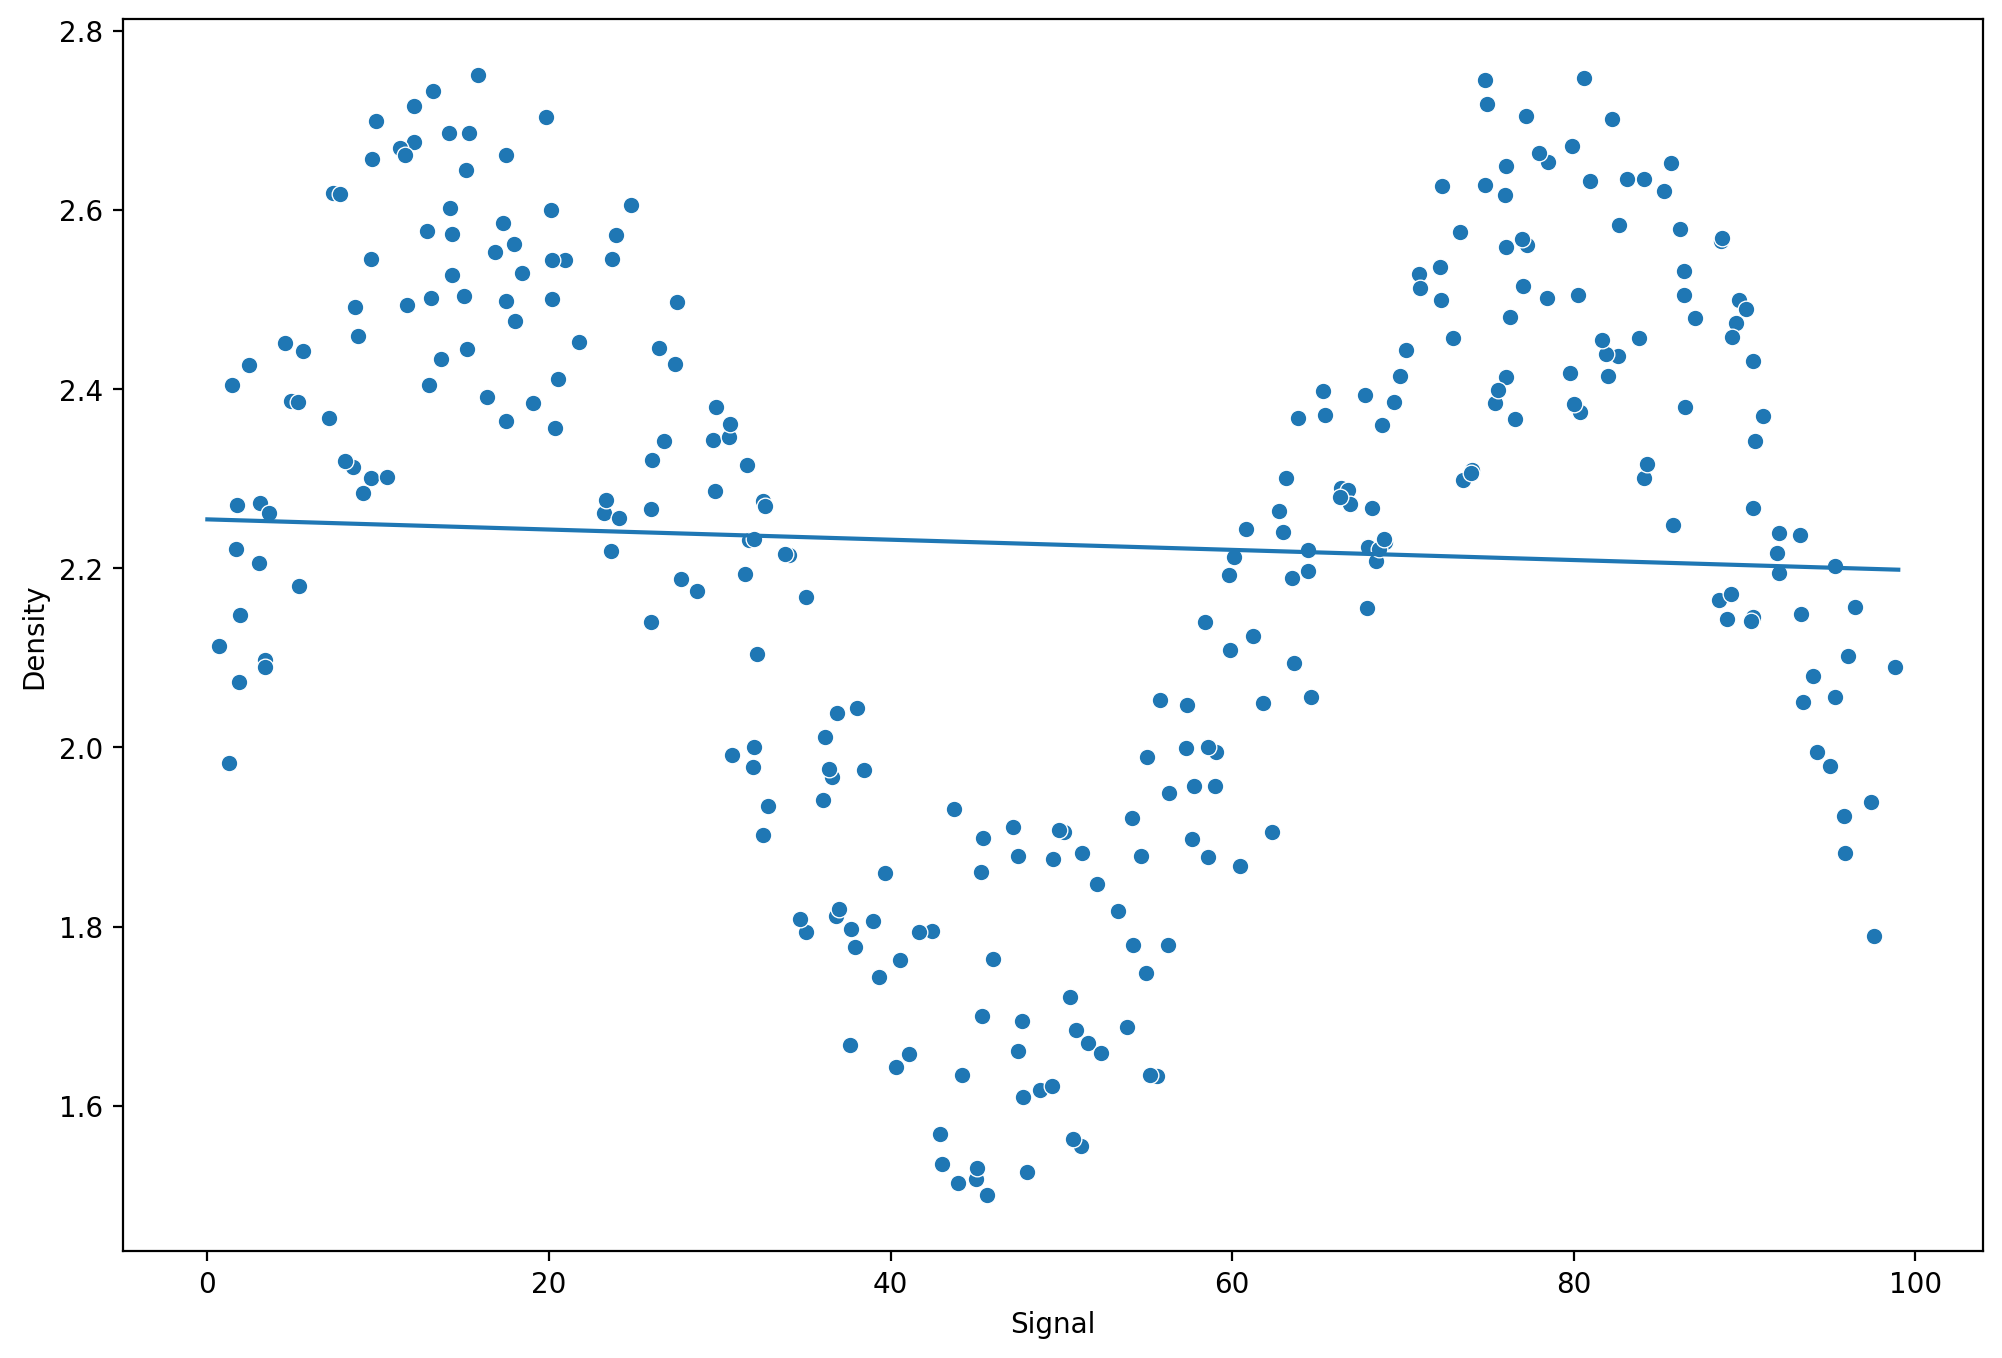

In [24]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x='Signal', y='Density')

plt.plot(signal_range, signal_predictions)

## Creating a Helper Function

In [25]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print(f"MAE: {mean_absolute_error(y_test, linear_regression_predictions)}")
    print(f"MSE: {mean_squared_error(y_test, linear_regression_predictions)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, linear_regression_predictions))}")
    
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(10,8), dpi=200)
    sns.scatterplot(data=df, x='Signal', y='Density', color='black')

    plt.plot(signal_range, output)

### Linear Regression

MAE: 0.24102551432457792
MSE: 0.08782350344651227
RMSE: 0.29635030529174805


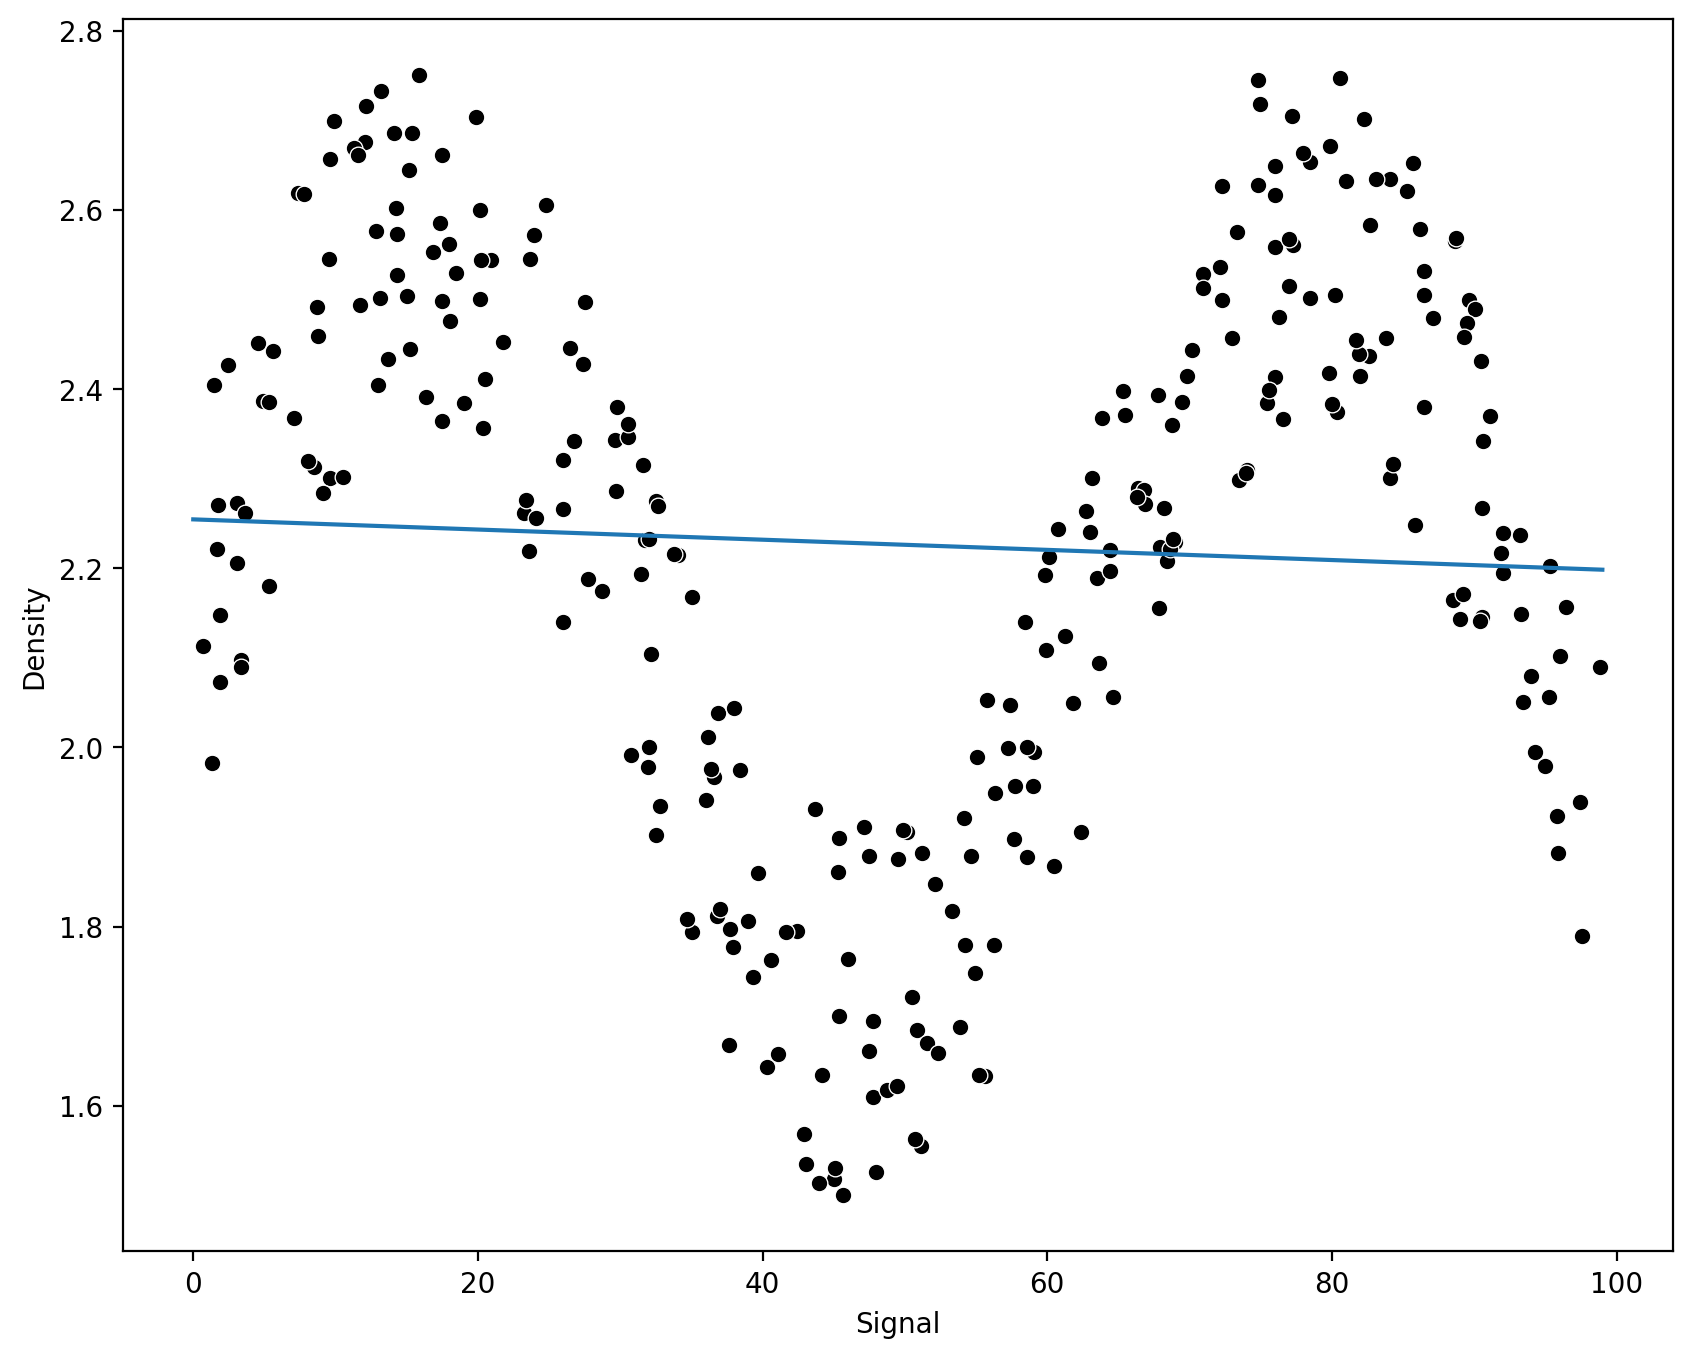

In [26]:
model = LinearRegression()
run_model(model, X_train, y_train, X_test, y_test)

### Polynomial Regression

MAE: 0.24102551432457792
MSE: 0.08782350344651227
RMSE: 0.29635030529174805


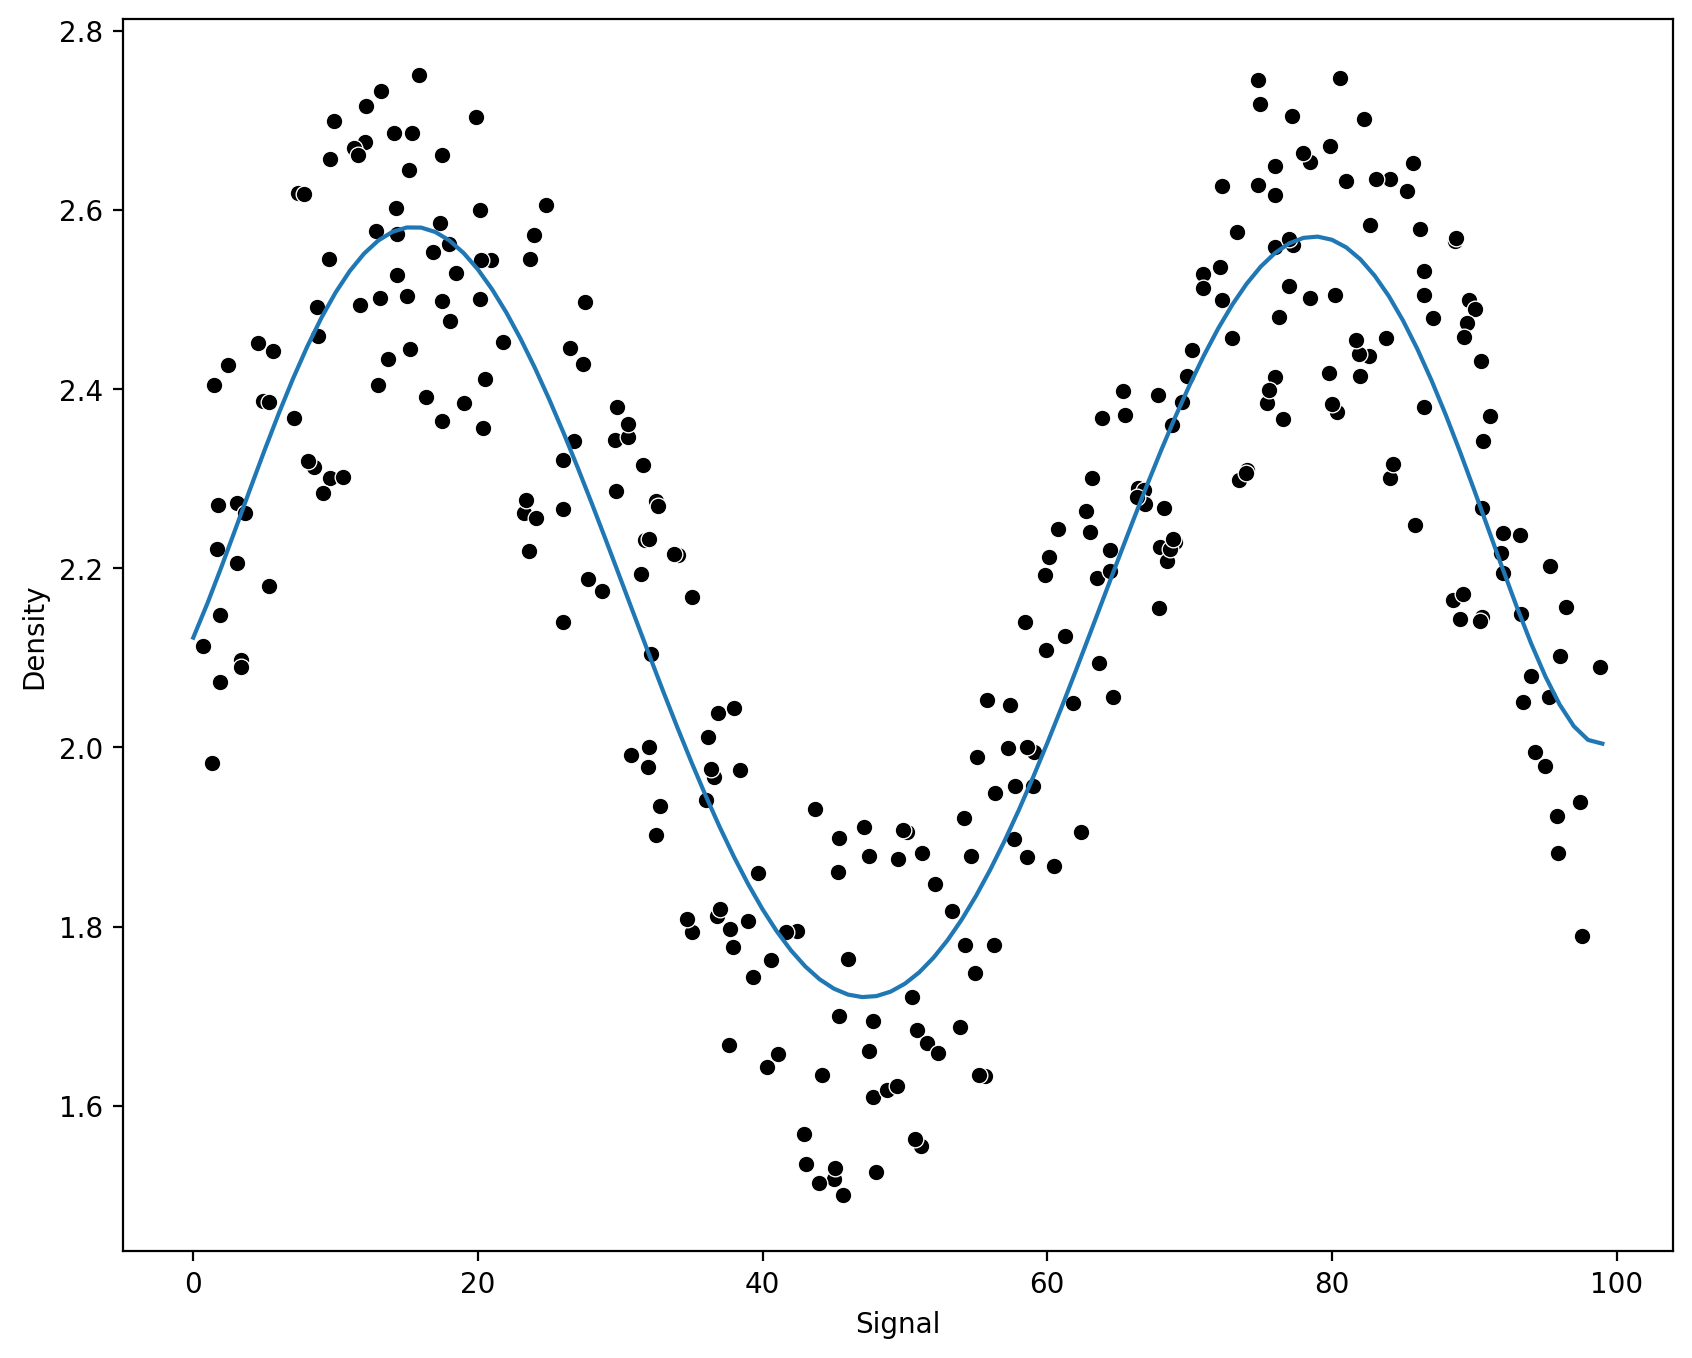

In [27]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
run_model(pipe, X_train, y_train, X_test, y_test)

### K Nearest Neighbor

MAE: 0.24102551432457792
MSE: 0.08782350344651227
RMSE: 0.29635030529174805


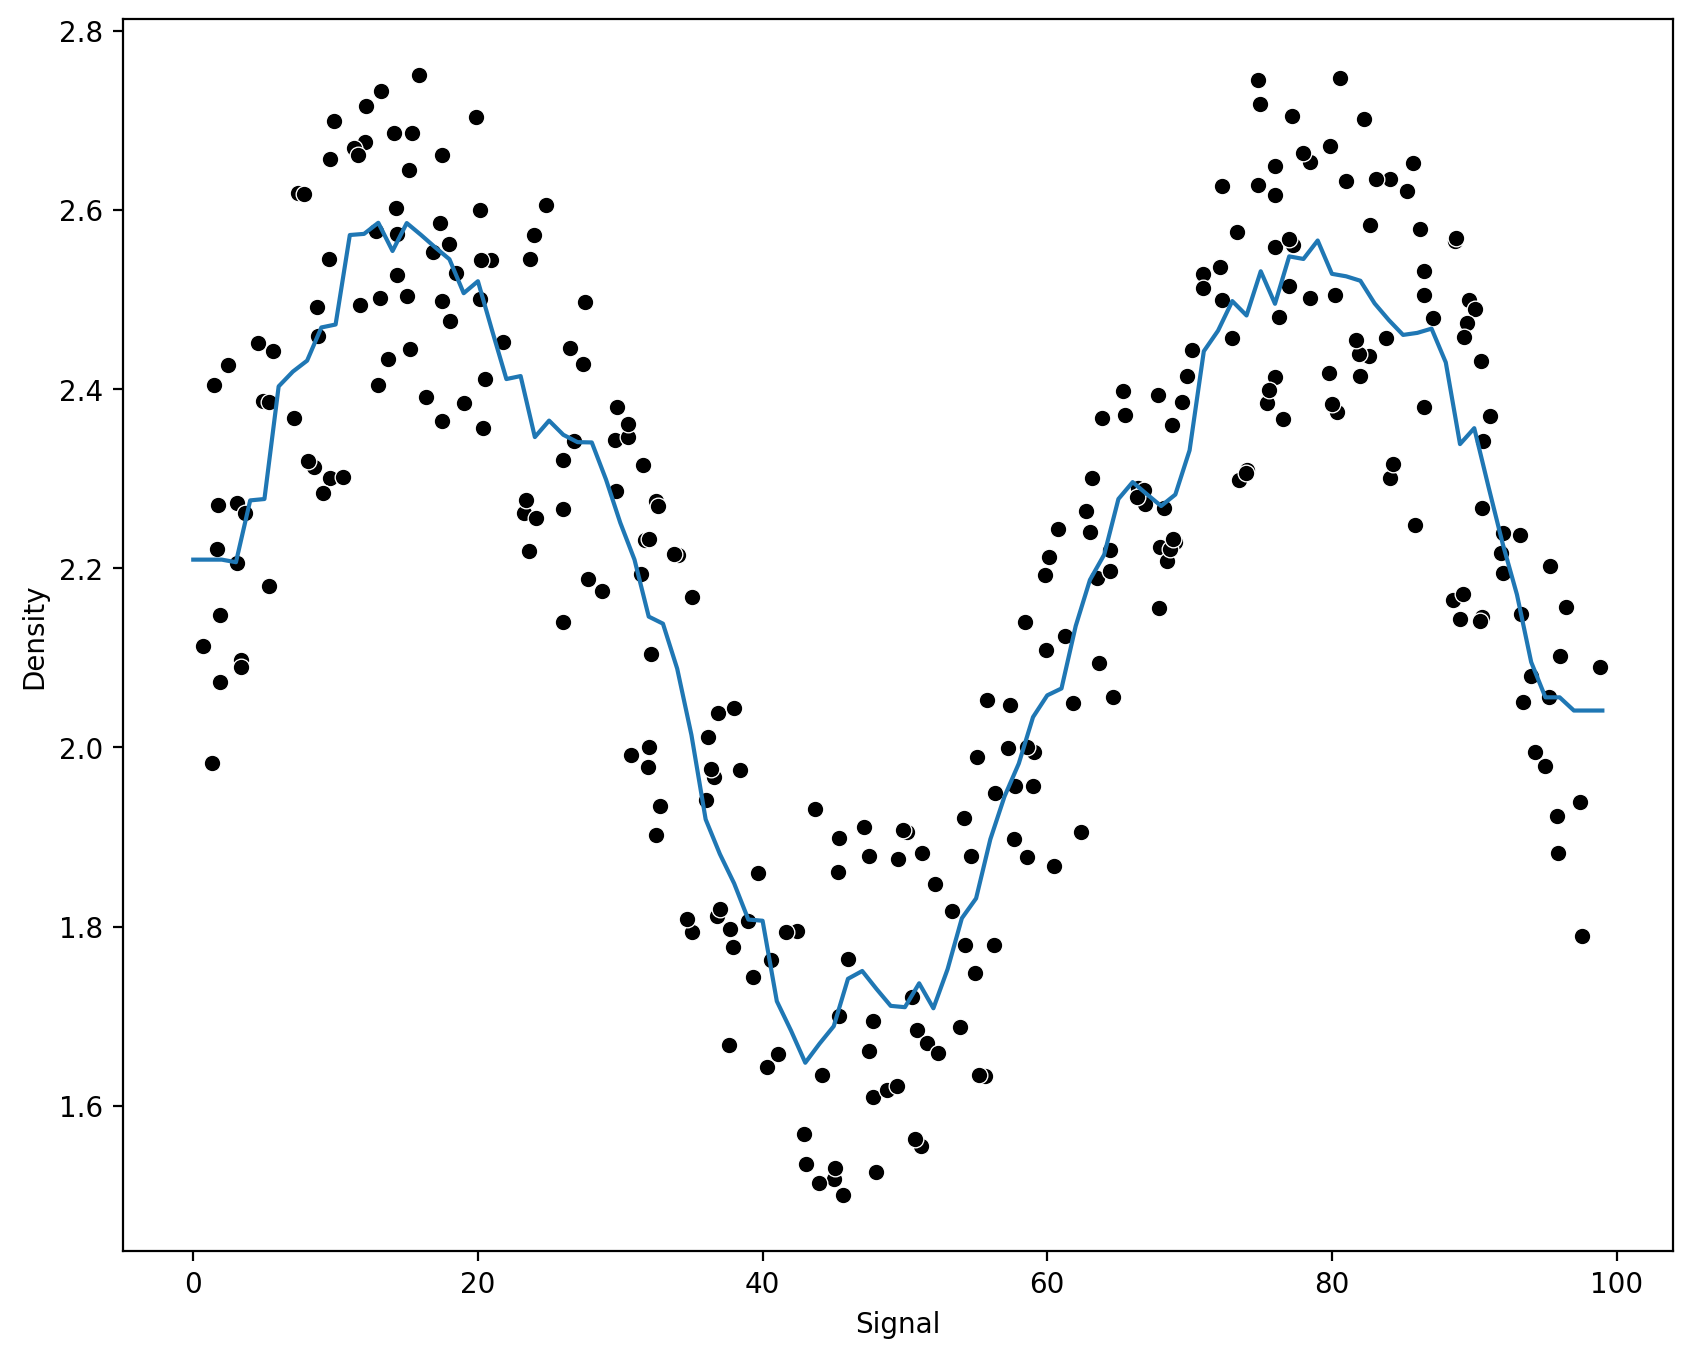

In [28]:
model = KNeighborsRegressor(n_neighbors=10)
run_model(model, X_train, y_train, X_test, y_test)

### Decision Tree

MAE: 0.24102551432457792
MSE: 0.08782350344651227
RMSE: 0.29635030529174805


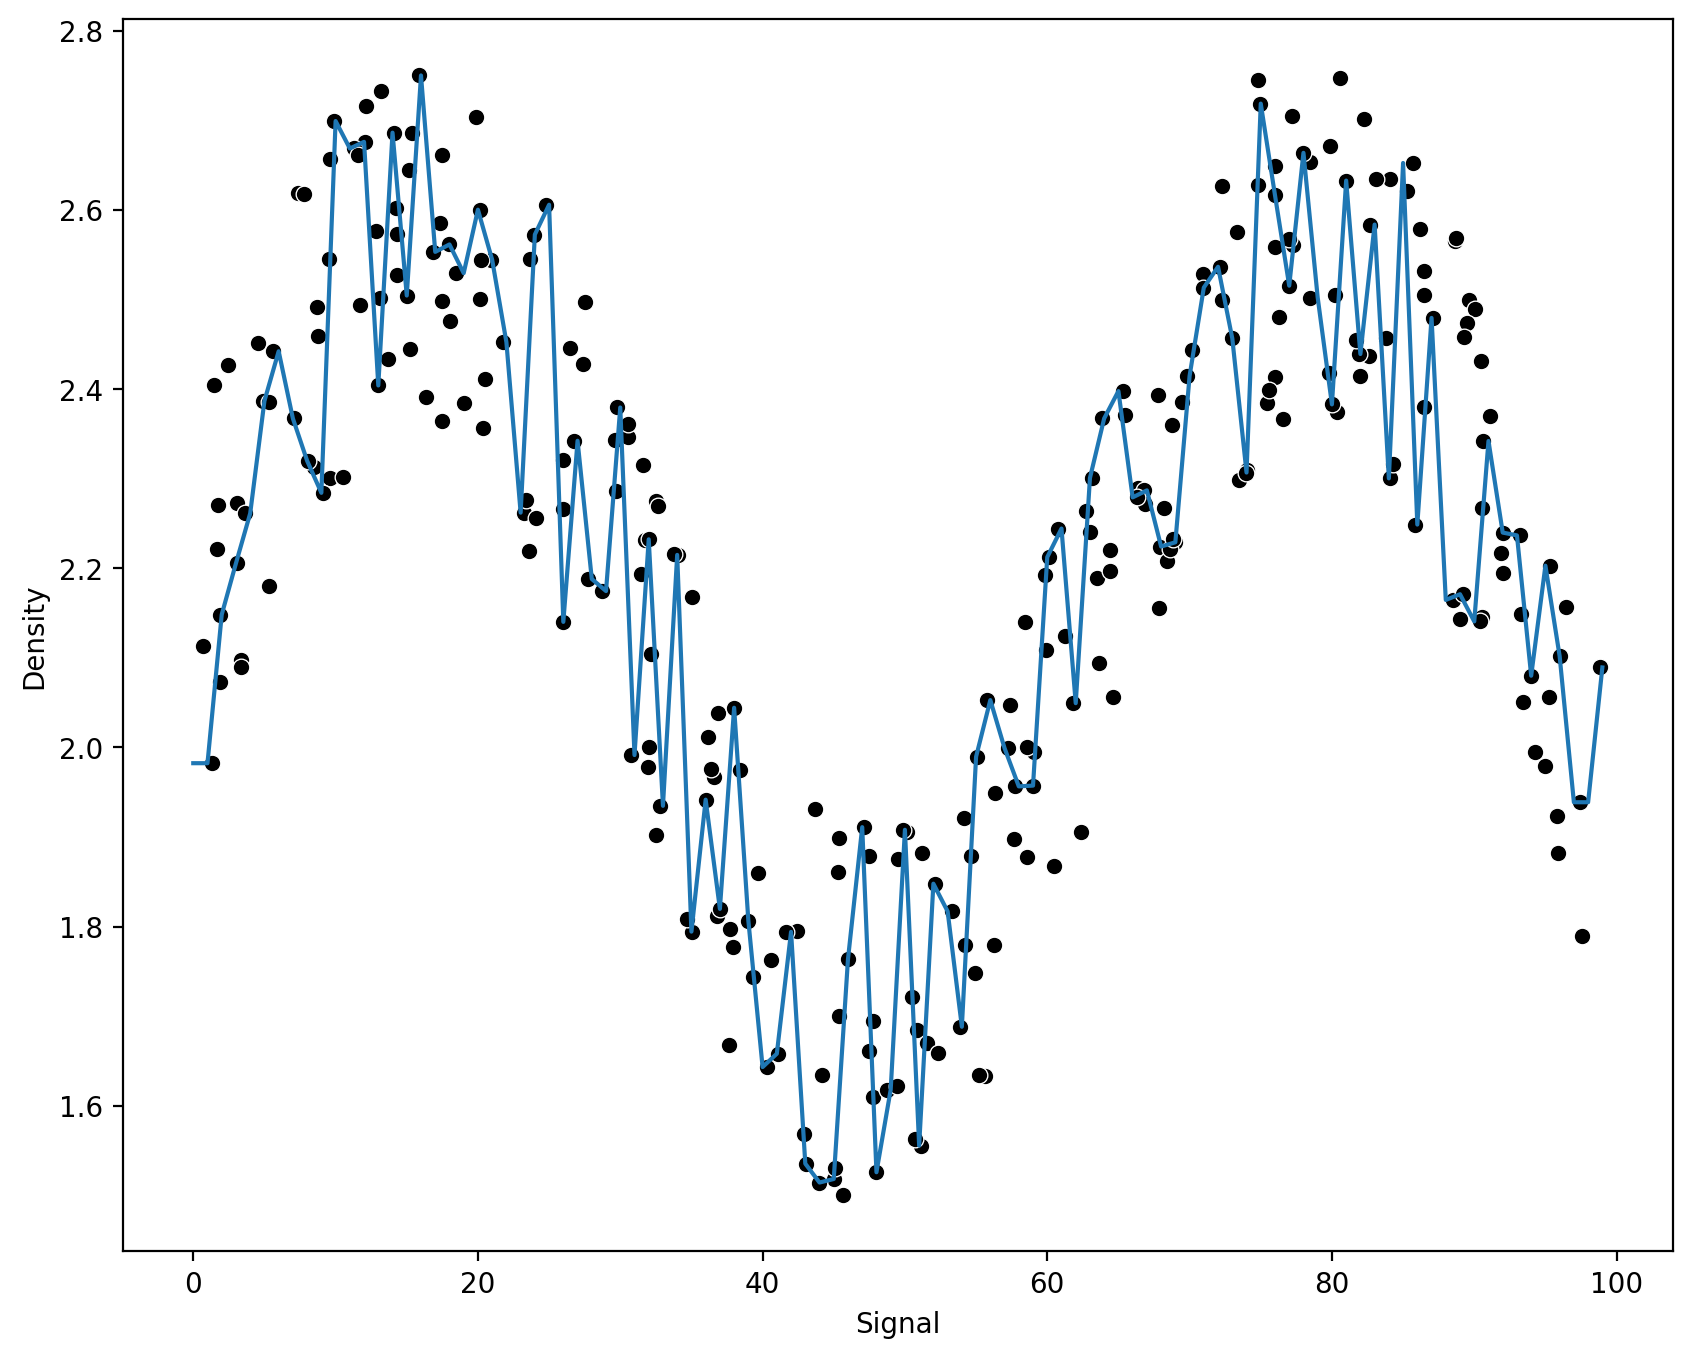

In [29]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

### Support Vector

In [30]:
model = SVR()

In [31]:
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
             'gamma': ['auto', 'scale']}

grid_model = GridSearchCV(model, param_grid)

MAE: 0.24102551432457792
MSE: 0.08782350344651227
RMSE: 0.29635030529174805


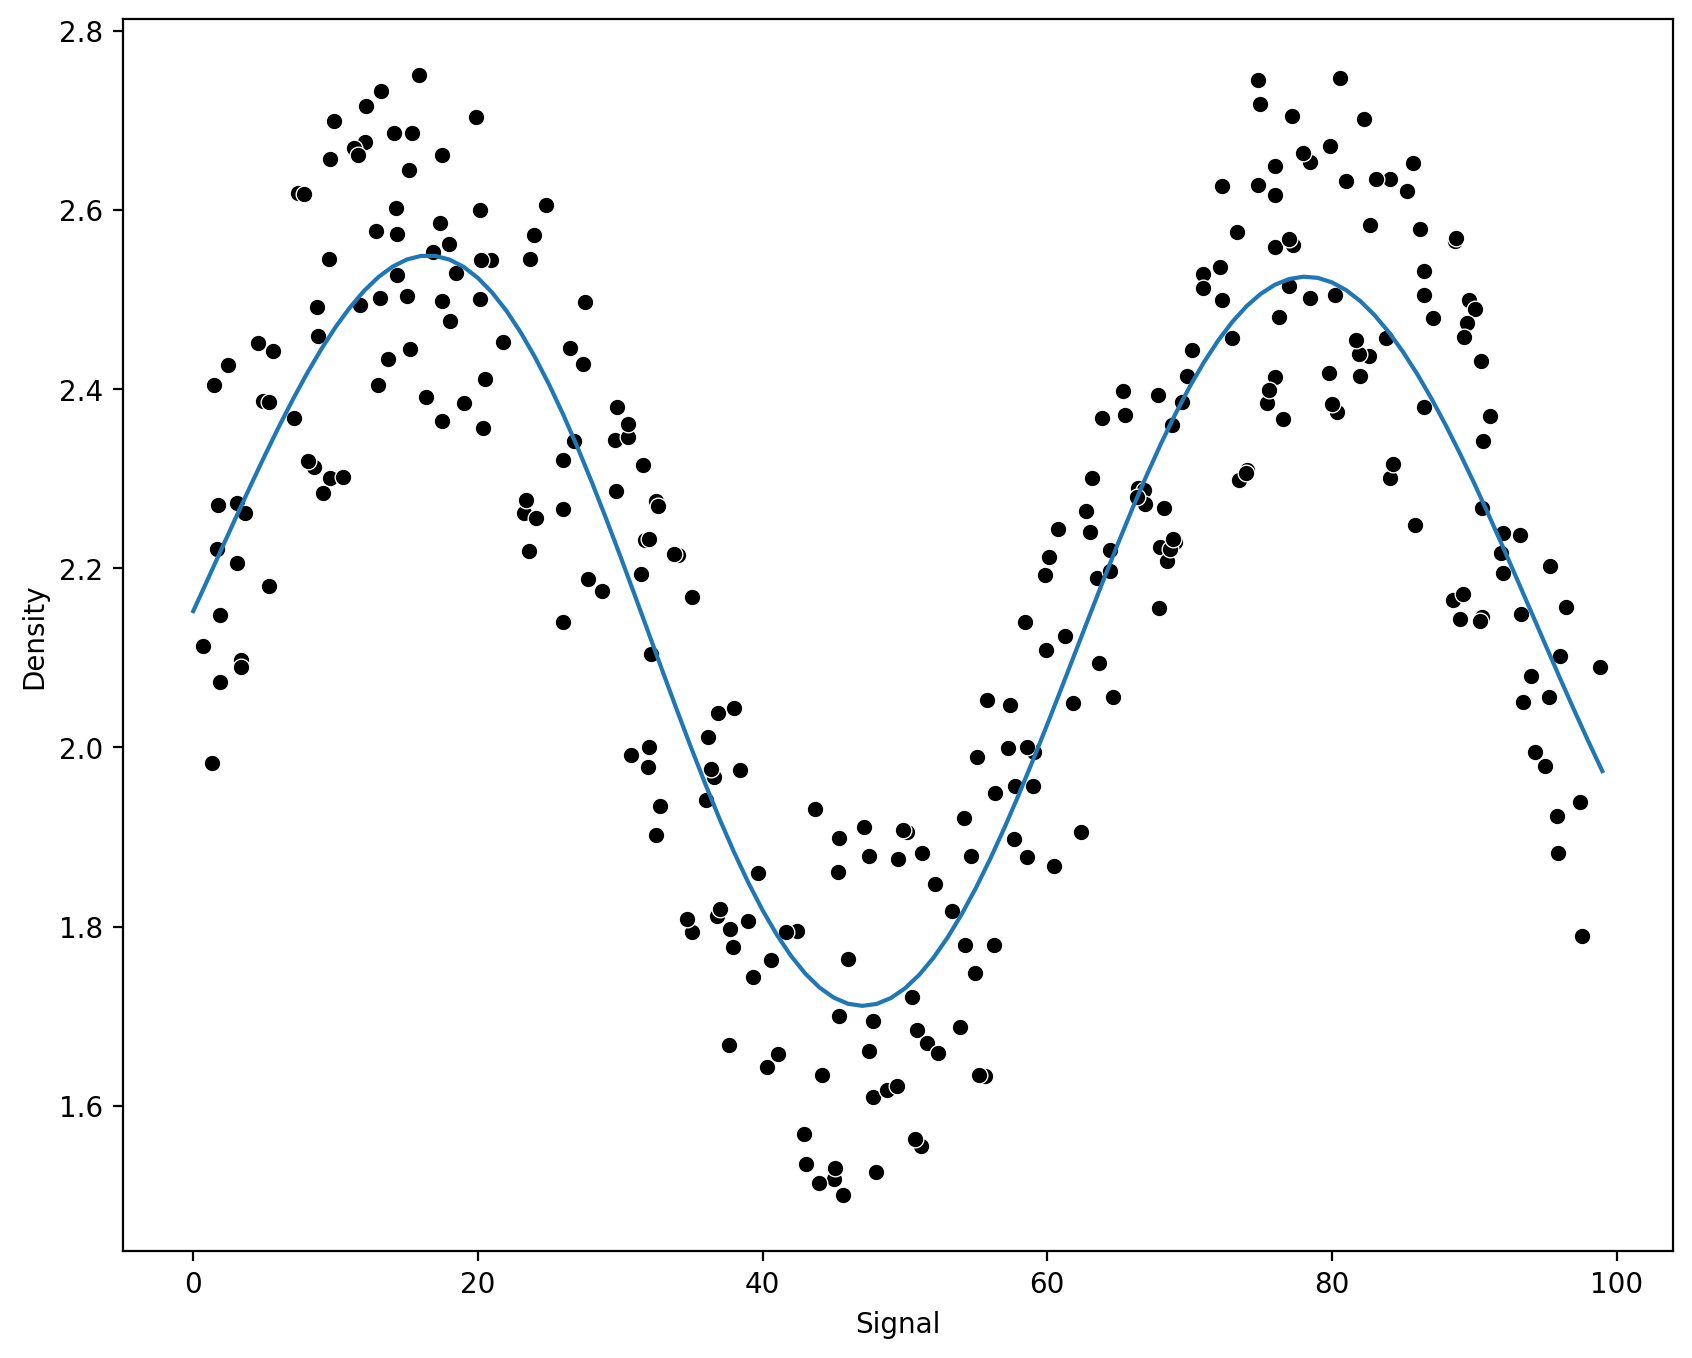

In [32]:
run_model(grid_model, X_train, y_train, X_test, y_test)

### Random Forest

MAE: 0.24102551432457792
MSE: 0.08782350344651227
RMSE: 0.29635030529174805


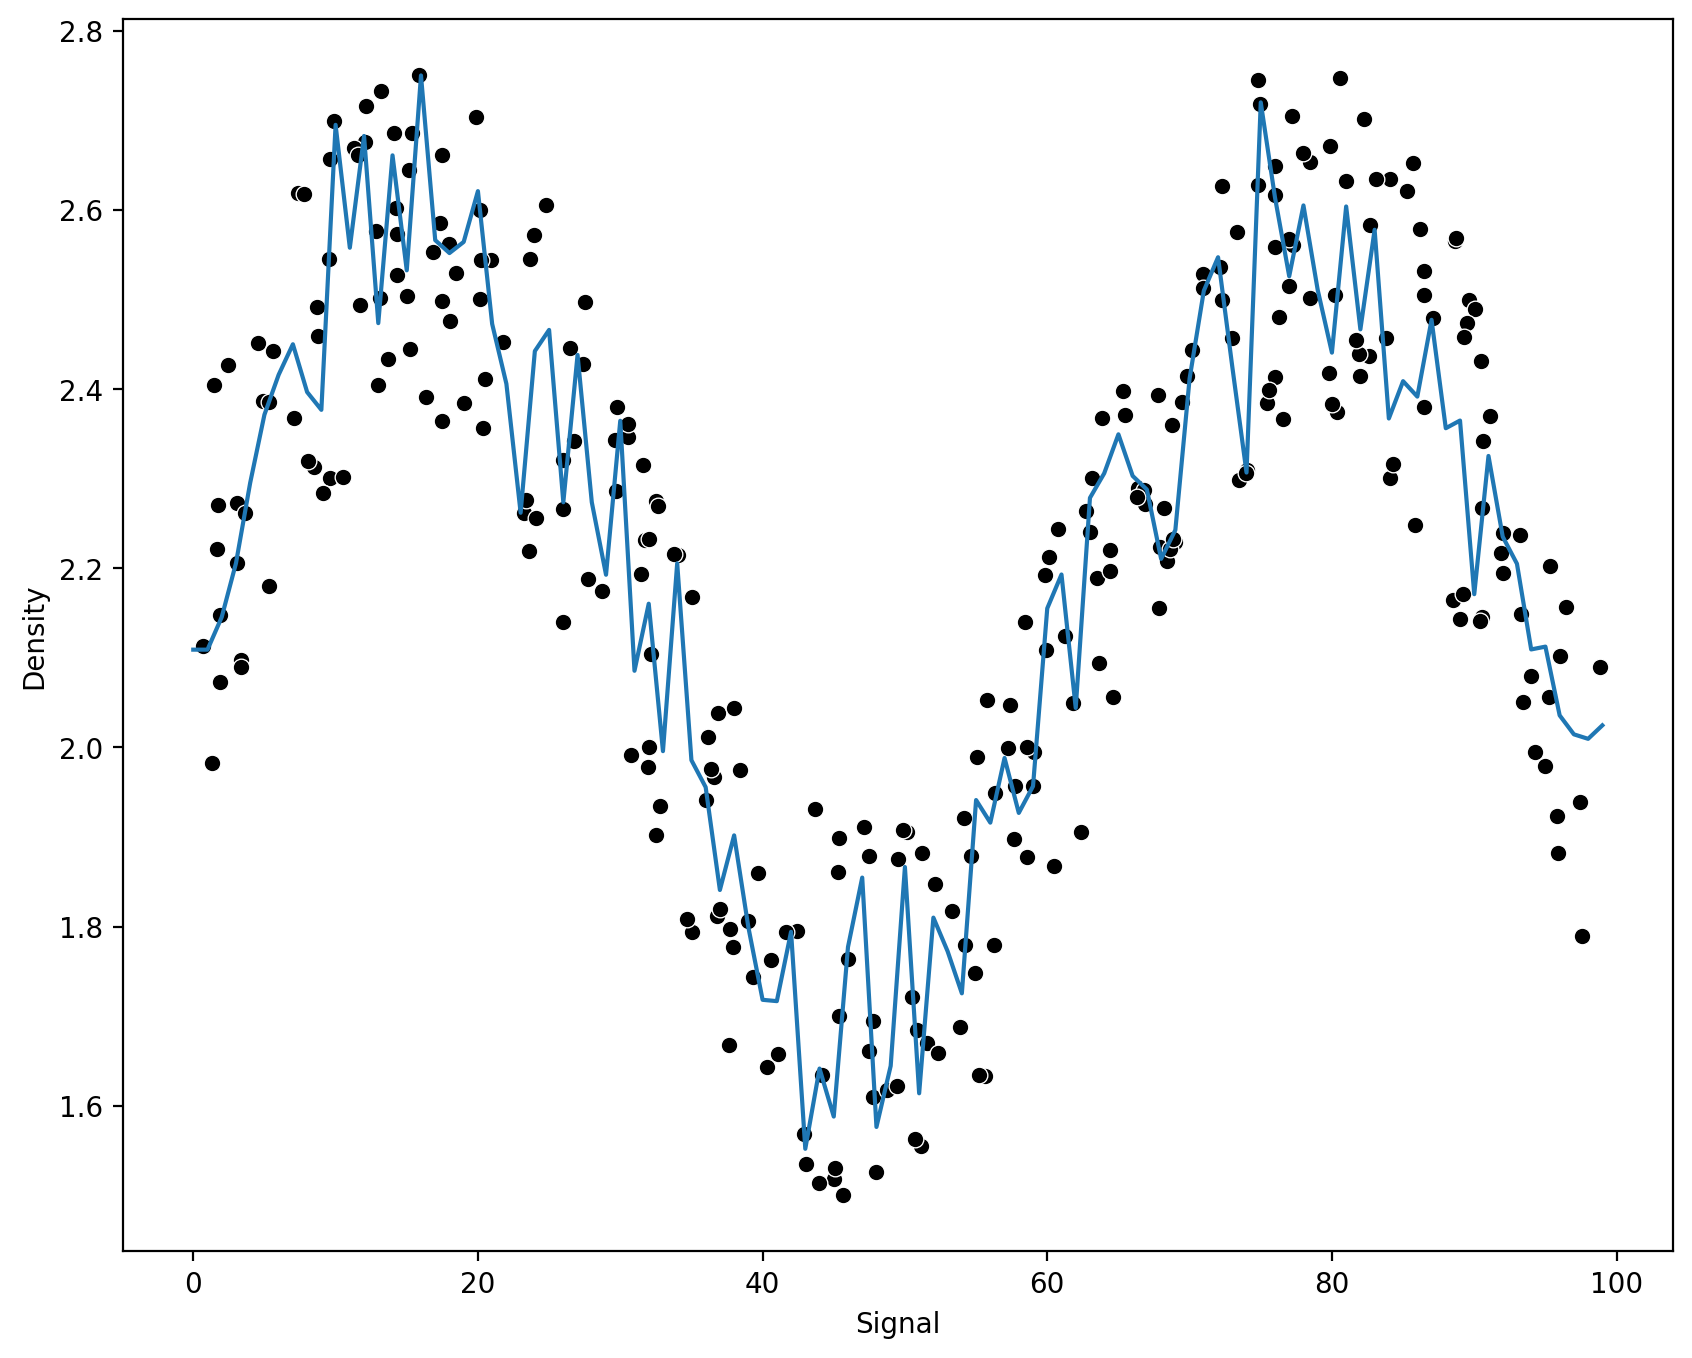

In [33]:
model = RandomForestRegressor(n_estimators=10)
run_model(model, X_train, y_train, X_test, y_test)

### Gradient Boosting

MAE: 0.24102551432457792
MSE: 0.08782350344651227
RMSE: 0.29635030529174805


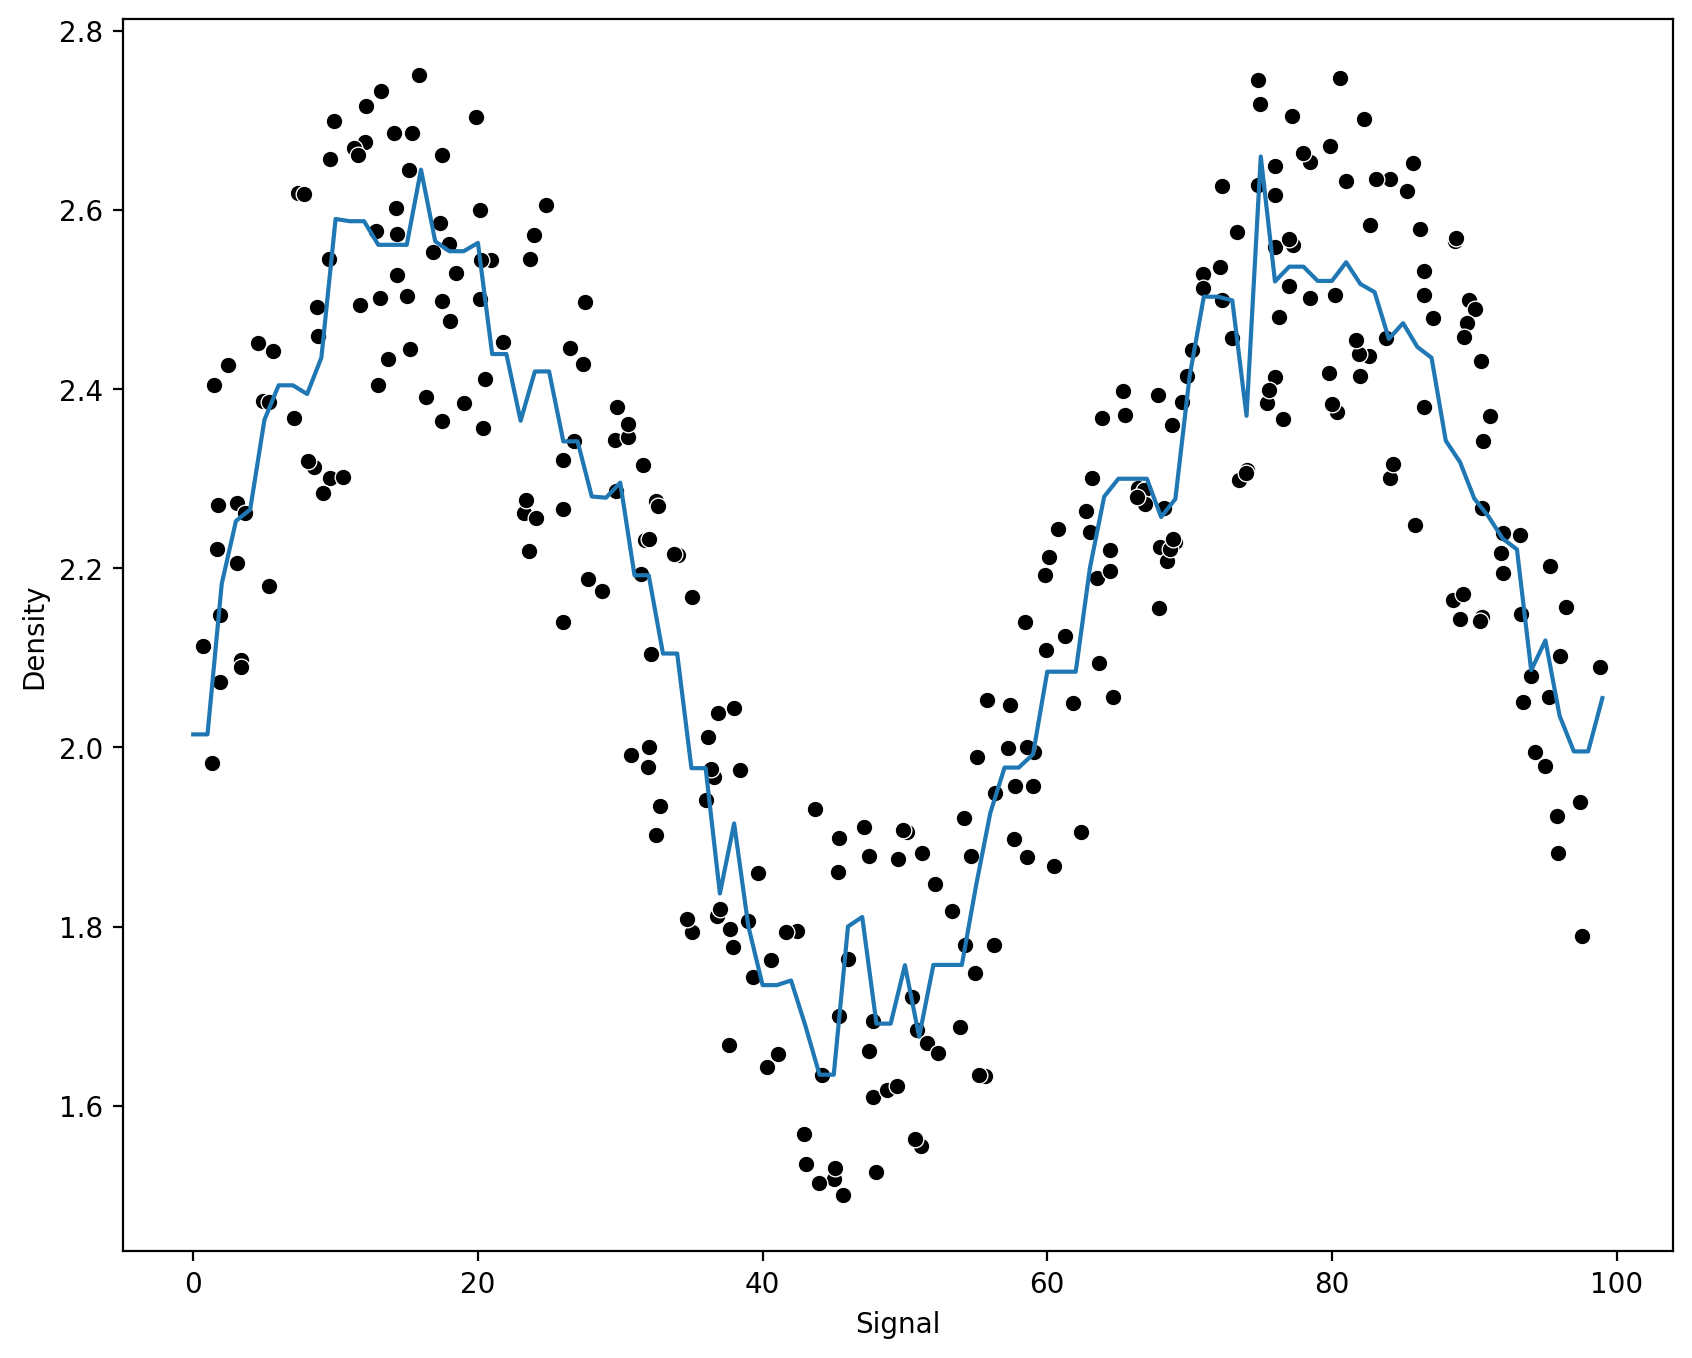

In [34]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

### AdaBoost

MAE: 0.24102551432457792
MSE: 0.08782350344651227
RMSE: 0.29635030529174805


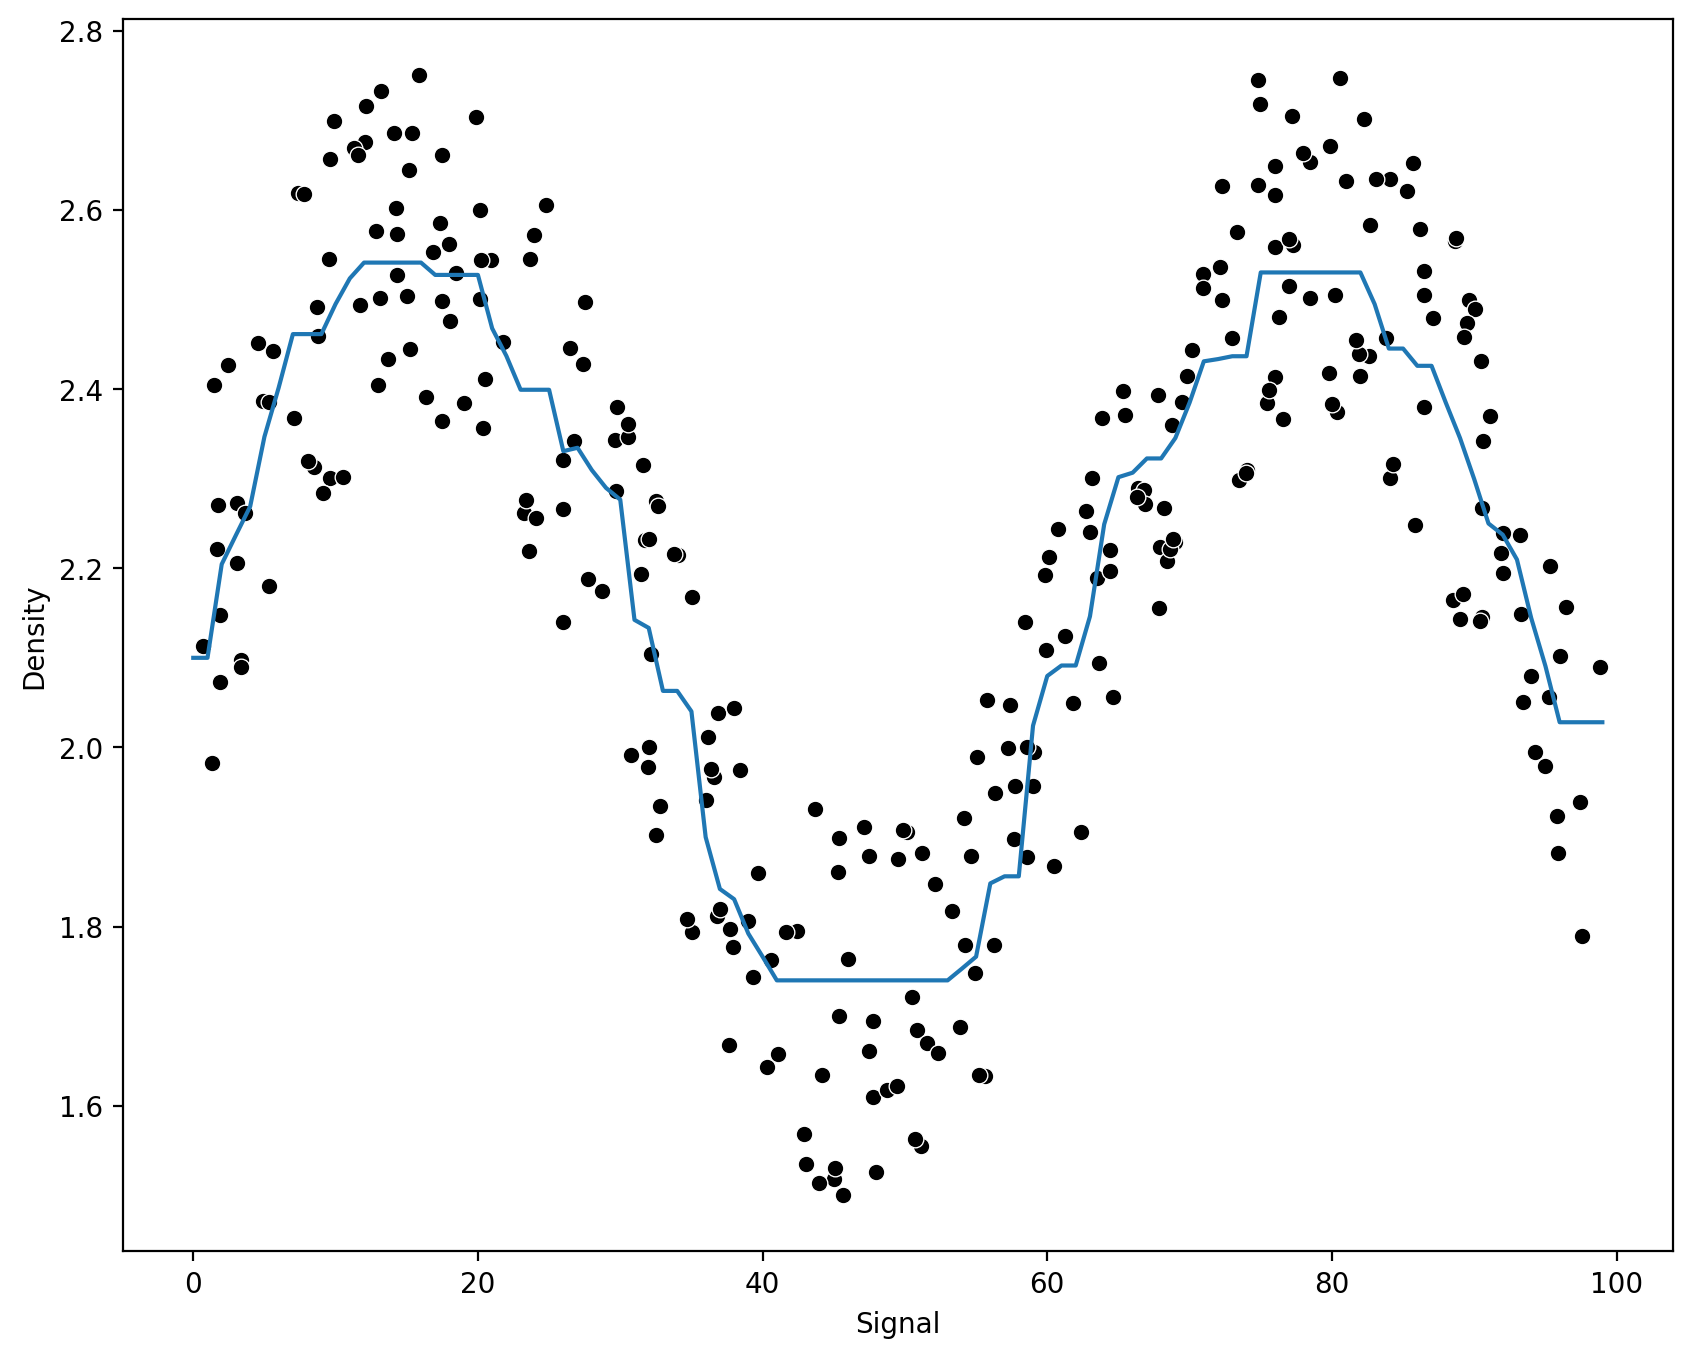

In [35]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)